# Handout 2: Unsupervised Learning (Problem 3)
#### Author: Miruna Andreea Gheata

In [1]:
import math
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import metrics
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Plots the data points of each class; if provided, it will also plot the decision boundary
def scatter_plot(X, y, title, xlabel, ylabel, num_points=60):
    plt.figure(1)
    plt.scatter(X[np.where(y == 0)[0]][:,0], X[np.where(y == 0)[0]][:,1], marker='+', color= '#FF4500', label='class 1')
    plt.scatter(X[np.where(y == 1)[0]][:,0], X[np.where(y == 1)[0]][:,1], marker='*', color= '#3CB371', label='class 2')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show(block=False)

In [3]:
def dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    return db.labels_, core_samples_mask

In [4]:
def calculate_clusters(X, y, n_clusters, linkage):
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=linkage)
    model.fit(X)
    model_labels = model.labels_
    show_clusters(X, y, model_labels, linkage)
    model_vmeasure = metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), model_labels)
    print(f"V-Measure: {model_vmeasure}")
    return model_labels, model_vmeasure

In [5]:
def show_clusters(X, y, labels, algorithm):
    for m in range(0, len(np.unique(labels))):
        plt.scatter(X[labels==m, 0], X[labels==m, 1], s=50, marker='o', c=np.array([random_color()]), label=f"Cluster {m}")
        plt.title(f"Clustering with {algorithm}-linkage algorithm\n({len(np.unique(labels))} clusters)")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
    plt.show()

In [6]:
def random_color():
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    return color

In [7]:
def plot_dbscan(y, core_samples_mask, labels, eps, min_samples):
    labels_true = y.reshape(y.shape[0]).tolist()
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # #############################################################################

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title(f'Estimated number of clusters: {n_clusters_} \n({eps}, {min_samples})')
    plt.show()

In [8]:
import numpy as np
group = '10'
ds = 4
data = np.loadtxt('datasets10/ds'+group+str(ds)+'.txt')
X = data[:, 0:2]
y = data[:, 2:3]

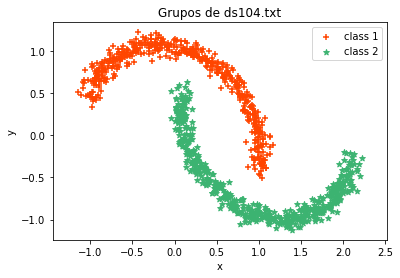

In [9]:
scatter_plot(X, y, "Grupos de ds104.txt", "x", "y")

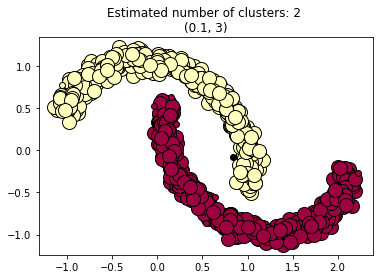

V-Measure: 0.9948234185997589


In [46]:
eps = 0.1
min_samples = 3
labels, core_samples_mask = dbscan(X, eps, min_samples)
plot_dbscan(y, core_samples_mask, labels, eps, min_samples)
model_vmeasure = metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")

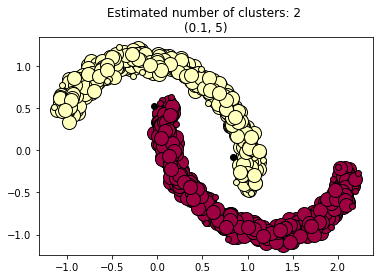

V-Measure: 0.9886992706958839


In [47]:
eps = 0.1
min_samples = 5
labels, core_samples_mask = dbscan(X, eps, min_samples)
plot_dbscan(y, core_samples_mask, labels, eps, min_samples)
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")

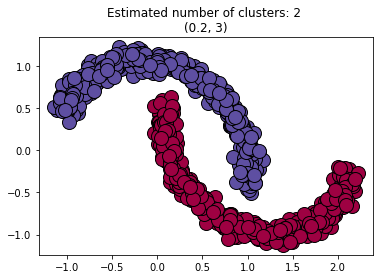

V-Measure: 1.0


array([[  0, 500],
       [500,   0]])

In [56]:
eps = 0.2
min_samples = 3
labels, core_samples_mask = dbscan(X, eps, min_samples)
plot_dbscan(y, core_samples_mask, labels, eps, min_samples)
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

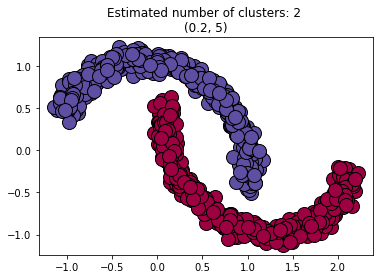

V-Measure: 1.0


array([[  0, 500],
       [500,   0]])

In [57]:
eps = 0.2
min_samples = 5
labels, core_samples_mask = dbscan(X, eps, min_samples)
plot_dbscan(y, core_samples_mask, labels, eps, min_samples)
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

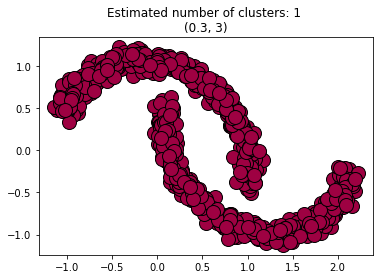

V-Measure: 0.0


In [50]:
eps = 0.3
min_samples = 3
labels, core_samples_mask = dbscan(X, eps, min_samples)
plot_dbscan(y, core_samples_mask, labels, eps, min_samples)
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")

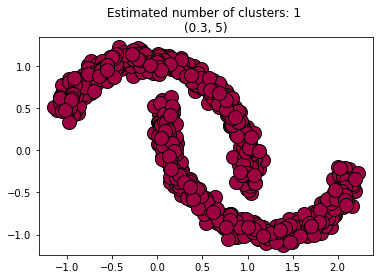

V-Measure: 0.0


In [51]:
eps = 0.3
min_samples = 5
labels, core_samples_mask = dbscan(X, eps, min_samples)
plot_dbscan(y, core_samples_mask, labels, eps, min_samples)
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")

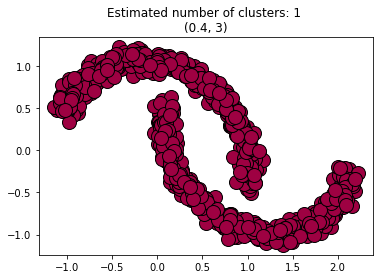

V-Measure: 0.0


In [52]:
eps = 0.4
min_samples = 3
labels, core_samples_mask = dbscan(X, eps, min_samples)
plot_dbscan(y, core_samples_mask, labels, eps, min_samples)
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")

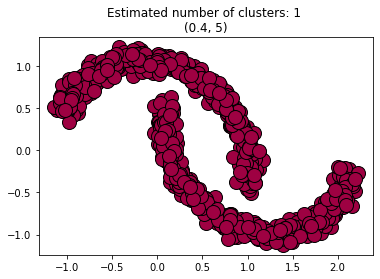

V-Measure: 0.0


In [53]:
eps = 0.4
min_samples = 5
labels, core_samples_mask = dbscan(X, eps, min_samples)
plot_dbscan(y, core_samples_mask, labels, eps, min_samples)
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")

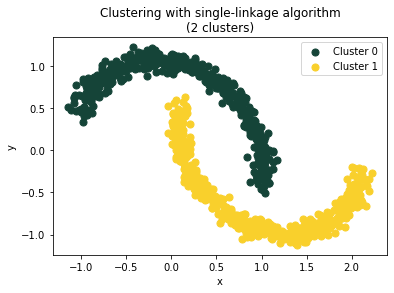

V-Measure: 1.0


array([[500,   0],
       [  0, 500]])

In [12]:
model_single_2_labels, model_single_2_vmeasure = calculate_clusters(X, y, 2, 'single')
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), model_single_2_labels)
cm